# Primera parte (Resumen del dataset, limpieza de datos , EDA, Analisis univariado, bivariado y multivariado)

## Abstracto: Motivaci√≥n y Audiencia

La seguridad alimentaria es un tema de importancia mundial ya que afecta directamente a la salud p√∫blica. En el Reino Unido, la Agencia de Normas Alimentarias (FSA) proporciona calificaciones de higiene alimentaria a diferentes empresas para informar a los consumidores y garantizar los est√°ndares de calidad en la industria de alimentos y
bebidas.

Este an√°lisis se centra en explorar y evaluar estas calificaciones de higiene para:

Determinar patrones de calidad de la salud en diferentes tipos de instituciones.

Examine qu√© factores afectan la calificaci√≥n de una empresa.

Proporcionando informaci√≥n √∫til para decisiones de salud p√∫blica, regulatorias y comerciales.

## Audiencia Beneficiada

## Consumidores
Personas que quieran tomar decisiones
informadas sobre d√≥nde comer o comprar
alimentos de forma segura.


## Analistas de Datos y Cient√≠ficos de Datos
Profesionales interesados en el an√°lisis de
datos relacionados con la seguridad y
calidad de los alimentos en la industria alimentaria.

## Autoridades de Regulaci√≥n
Organismos de salud p√∫blica y organismos
de control que buscan mejorar las
condiciones sanitarias en los locales de
alimentaci√≥n.

## Due√±os de Negocios en la Industria Alimentaria
Restaurantes, cafeter√≠as y supermercados
que buscan mejorar sus est√°ndares de
higiene y cumplir con regulaciones.

In [ ]:
# ------------------ IMPORTAR LIBRER√çAS ------------------
import requests
import pandas as pd
import numpy as np
import missingno as msno
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


# Configuraci√≥n de gr√°ficos
sns.set(style="whitegrid")


# ------------------ 1Ô∏è‚É£ EXTRACCI√ìN DE DATOS DESDE LA API ------------------


API_URL = "https://ratings.food.gov.uk/api/open-data-files/FHRS529en-GB.json"
response = requests.get(API_URL)


if response.status_code == 200:
    hygiene_data = response.json()
    print("Datos obtenidos correctamente.")
else:
    print(f" Error en la solicitud: {response.status_code}")
    exit()

Datos obtenidos correctamente.


In [ ]:

# ------------------ 2Ô∏è‚É£ MANEJO DE LA ESTRUCTURA DEL JSON ------------------

# Extraer la lista de establecimientos
if "FHRSEstablishment" in hygiene_data and "EstablishmentCollection" in hygiene_data["FHRSEstablishment"]:
    establishments = hygiene_data["FHRSEstablishment"]["EstablishmentCollection"]
    df = pd.DataFrame(establishments)
    print(" DataFrame creado con √©xito.")
else:
    print(" No se encontraron datos en la API.")
    exit()



 DataFrame creado con √©xito.


## Resumen de Metadata

## Informaci√≥n General del Dataset

El conjunto de datos analizado proviene de la API de la Agencia de Normas Alimentarias del Reino Unido y contiene informaci√≥n de calificaci√≥n de higiene para diferentes empresas. A continuaci√≥n se
muestra un resumen de su estructura:

N√∫mero de **filas**: 1,303 registros (establecimientos analizados).

N√∫mero de **columnas**: 25 caracter√≠sticas sobre cada establecimiento.

Tipos de Variables en el Dataset

Variables Categ√≥ricas: incluyen identificadores, nombres de negocios, tipos de establecimientos, esquemas de calificaci√≥n, y otros campos de texto o booleanos relevantes para clasificar y describir cada entidad.

Variables Num√©ricas: abarcan identificadores √∫nicos, puntuaciones otorgadas durante la inspecci√≥n (como higiene, estructura y confianza en la gesti√≥n), as√≠ como coordenadas geogr√°ficas.

Variables de Fecha y Localizaci√≥n: representan la fecha de inspecci√≥n y componentes de la direcci√≥n del establecimiento, √∫tiles para an√°lisis temporales y espaciales.

In [ ]:

# ------------------ 3Ô∏è‚É£ DESCRIPCI√ìN DEL DATASET ------------------
print("Informaci√≥n general del dataset:")
print(df.info())


print("Primeras 10 filas:")
print(df.head(10))


print("Estad√≠sticas descriptivas:")
print(df.describe(include="all"))


Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   FHRSID                      1291 non-null   int64 
 1   LocalAuthorityBusinessID    1291 non-null   object
 2   BusinessName                1291 non-null   object
 3   BusinessType                1291 non-null   object
 4   BusinessTypeID              1291 non-null   int64 
 5   RatingValue                 1291 non-null   object
 6   RatingKey                   1291 non-null   object
 7   RatingDate                  1099 non-null   object
 8   LocalAuthorityCode          1291 non-null   object
 9   LocalAuthorityName          1291 non-null   object
 10  LocalAuthorityWebSite       1291 non-null   object
 11  LocalAuthorityEmailAddress  1291 non-null   object
 12  Scores                      1048 non-null   object
 13  SchemeType    

## Valores nulos en el dataset:

**RatingDate** tiene 181 valores nulos (faltan fechas de inspecci√≥n
en algunos establecimientos).

**Geocode** tiene 207 valores nulos (coordenadas geogr√°ficas
faltantes en algunos registros).

**Scores** tiene 232 valores nulos, ya que algunas inspecciones no
incluyen puntuaciones detalladas.

Las columnas **AddressLine3** y **AddressLine 4** van a ser eliminadas
ya que tienen muchos valores nulos y no son necesarias

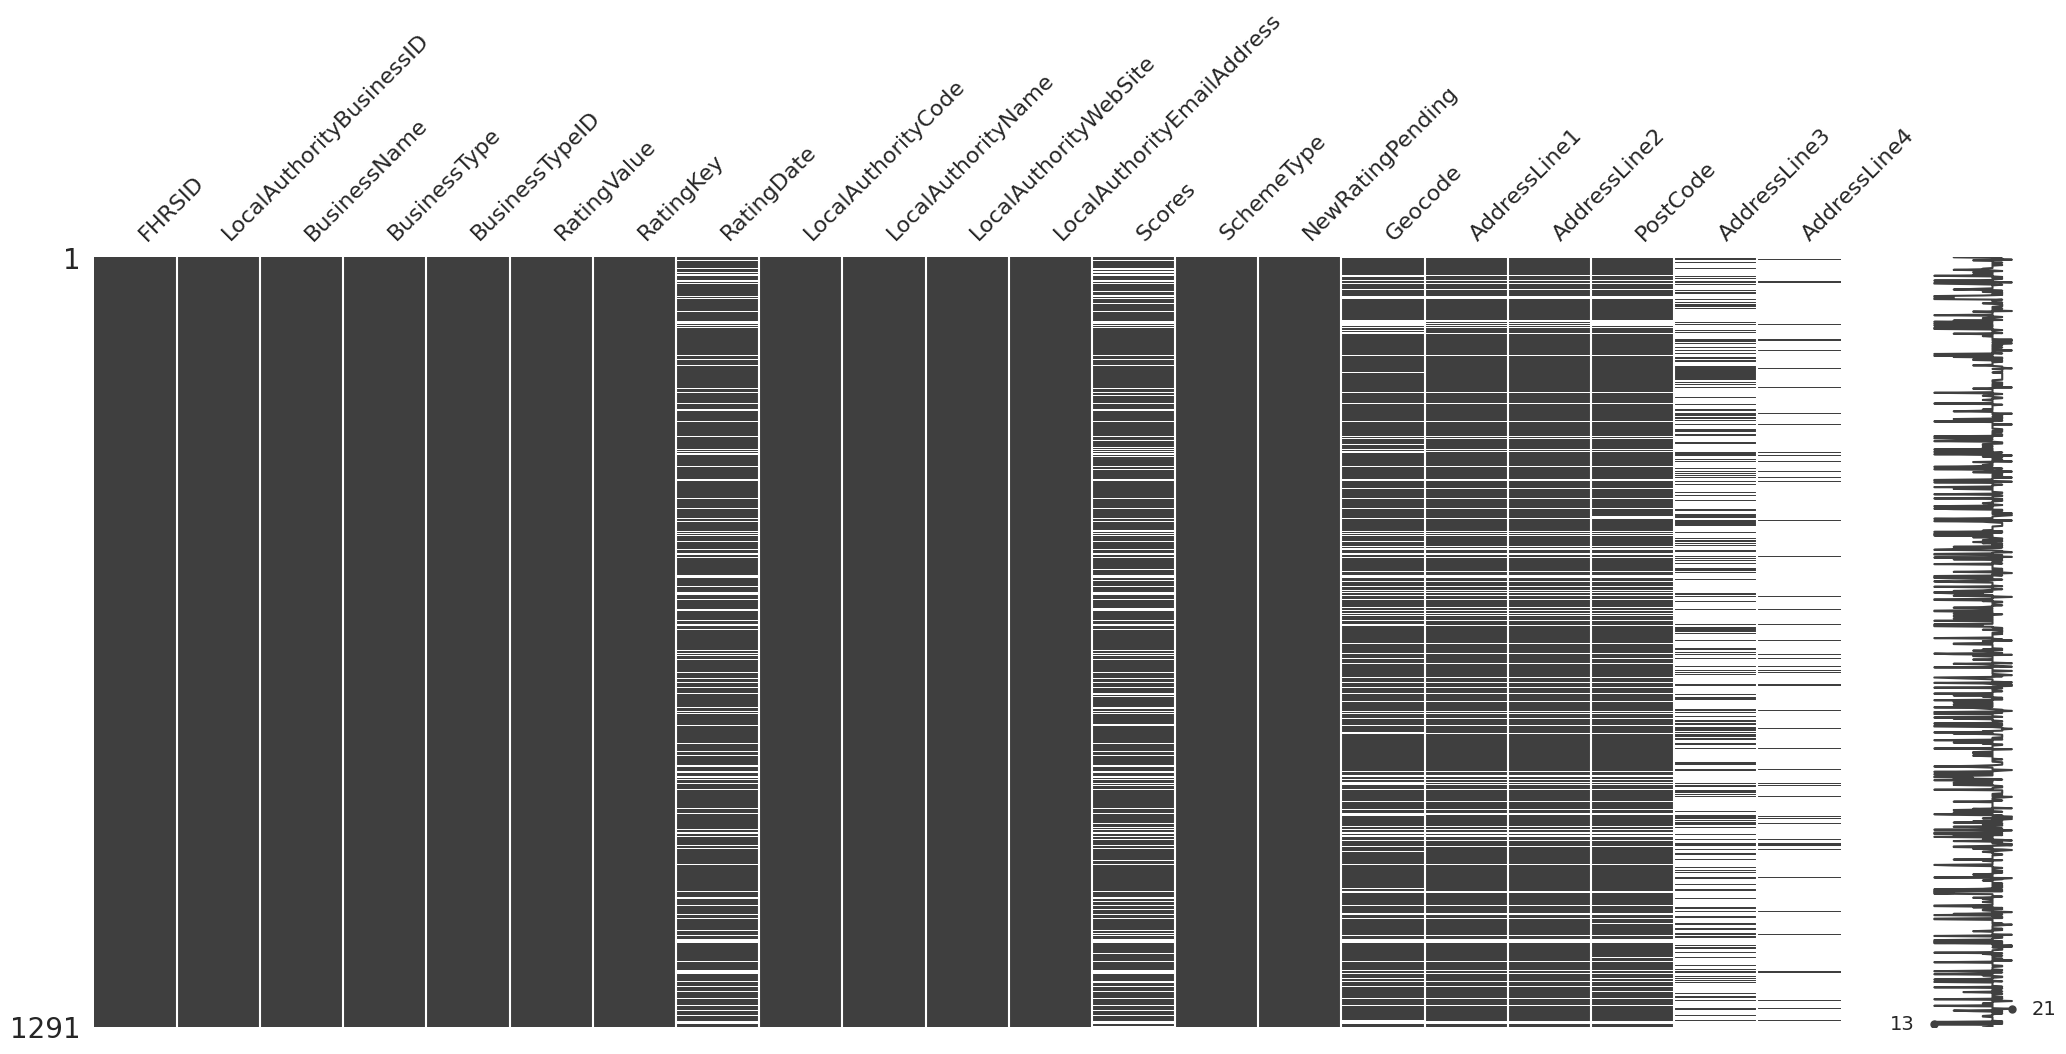


 Dataset limpio. N√∫mero de filas despu√©s de eliminar nulos: 962
<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, 1 to 1289
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   FHRSID                      962 non-null    int64 
 1   LocalAuthorityBusinessID    962 non-null    object
 2   BusinessName                962 non-null    object
 3   BusinessType                962 non-null    object
 4   BusinessTypeID              962 non-null    int64 
 5   RatingValue                 962 non-null    object
 6   RatingKey                   962 non-null    object
 7   RatingDate                  962 non-null    object
 8   LocalAuthorityCode          962 non-null    object
 9   LocalAuthorityName          962 non-null    object
 10  LocalAuthorityWebSite       962 non-null    object
 11  LocalAuthorityEmailAddress  962 non-null    object
 12  Scores                      962 non-null   

In [ ]:

# ------------------ 4Ô∏è‚É£ LIMPIEZA DE DATOS ------------------
msno.matrix(df)
plt.show()

# Eliminamos columnas con muchos nulos
for col in ["AddressLine3", "AddressLine4"]:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Eliminamos solo las filas que tienen nulos en columnas clave
columnas_clave = ["RatingDate", "Scores", "Geocode"]
df.dropna(subset=columnas_clave, inplace=True)

# Verificaci√≥n final
print(f"\n Dataset limpio. N√∫mero de filas despu√©s de eliminar nulos: {df.shape[0]}")
print(df.info())


In [ ]:
# ------------------ 5Ô∏è‚É£ MANEJO DE DATOS ANIDADOS ------------------

# Extraer las puntuaciones de higiene, estructura y confianza en la gesti√≥n
if "Scores" in df.columns:
    scores_df = df["Scores"].apply(pd.Series)
    df = pd.concat([df.drop(columns=["Scores"]), scores_df], axis=1)


# Extraer coordenadas de geolocalizaci√≥n
if "Geocode" in df.columns:
    geo_df = df["Geocode"].apply(pd.Series)
    df = pd.concat([df.drop(columns=["Geocode"]), geo_df], axis=1)


# Reemplazar valores nulos en las nuevas columnas con -1 (para indicar falta de datos)
df.fillna({"Hygiene": -1, "Structural": -1, "ConfidenceInManagement": -1, "Longitude": np.nan, "Latitude": np.nan}, inplace=True)


print("\n Datos despu√©s de la transformaci√≥n:")
print(df.info())


# ------------------ 6Ô∏è‚É£ ENRIQUECIMIENTO DE DATOS ------------------
print("\n Enriqueciendo datos...")
df["RatingDate"] = pd.to_datetime(df["RatingDate"], errors="coerce")  # Convertir a fecha
df["Hygiene_Score_Level"] = df["Hygiene"].apply(lambda x: "Bajo" if x <= 5 else "Alto")  # Categorizar higiene


 Datos despu√©s de la transformaci√≥n:
<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, 1 to 1289
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   FHRSID                      962 non-null    int64 
 1   LocalAuthorityBusinessID    962 non-null    object
 2   BusinessName                962 non-null    object
 3   BusinessType                962 non-null    object
 4   BusinessTypeID              962 non-null    int64 
 5   RatingValue                 962 non-null    object
 6   RatingKey                   962 non-null    object
 7   RatingDate                  962 non-null    object
 8   LocalAuthorityCode          962 non-null    object
 9   LocalAuthorityName          962 non-null    object
 10  LocalAuthorityWebSite       962 non-null    object
 11  LocalAuthorityEmailAddress  962 non-null    object
 12  SchemeType                  962 non-null    object
 13  NewRatingPendi

In [ ]:
# ------------------ 8Ô∏è‚É£ CONECTAR A BASE DE DATOS SQL ------------------


conn = sqlite3.connect("hygiene_ratings.sqlite")
df.to_sql("hygiene_ratings", conn, index=False, if_exists="replace")
print(" Datos guardados en SQLite.")


# ------------------ 9Ô∏è‚É£ CONSULTAS SQL ------------------
def execute_and_display(query, conn, description):
    print(f"\n {description}")
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]


    print(pd.DataFrame(results, columns=columns))


# 1Ô∏è‚É£ Mostrar los primeros 10 establecimientos
query_1 = "SELECT * FROM hygiene_ratings LIMIT 10;"
execute_and_display(query_1, conn, "Primeras 10 filas de la base de datos")


# 2Ô∏è‚É£ Contar el n√∫mero total de establecimientos
query_2 = "SELECT COUNT(*) AS total_establishments FROM hygiene_ratings;"
execute_and_display(query_2, conn, "N√∫mero total de establecimientos")


# 3Ô∏è‚É£ Obtener las 5 peores calificaciones de higiene
query_3 = """
SELECT BusinessName, RatingValue, Hygiene
FROM hygiene_ratings
WHERE Hygiene >= 0
ORDER BY Hygiene DESC
LIMIT 5;
"""
execute_and_display(query_3, conn, "Establecimientos con peor higiene")


# 4Ô∏è‚É£ Obtener las 5 mejores calificaciones de higiene
query_4 = """
SELECT BusinessName, RatingValue, Hygiene
FROM hygiene_ratings
WHERE Hygiene >= 0
ORDER BY Hygiene ASC
LIMIT 5;
"""
execute_and_display(query_4, conn, "Establecimientos con mejor higiene")


# Cerrar la conexi√≥n
conn.close()
print("\n Conexi√≥n cerrada. ¬°An√°lisis completo!")




# Asegurar que la columna "Hygiene" existe y no tiene valores nulos
df_numeric = df[["Hygiene"]].dropna()


 Datos guardados en SQLite.

 Primeras 10 filas de la base de datos
    FHRSID LocalAuthorityBusinessID                          BusinessName  \
0  1634041             23/00265/COM                  3B Convenience Store   
1   898515             06/00098/COM                A - Z Afterschool Club   
2  1080769             18/00246/COM                   A And J Mini Market   
3  1419391             21/00426/COM           A To Z Fresh Sutton Limited   
4   632116         06625/0082/2/000                            Abbeyfield   
5   553481         06952/0082/2/000                            Abbeyfield   
6  1038629             18/00077/COM                 ABI Convenience Store   
7  1624010             23/00207/COM  ABM Catering @ Overton Grange School   
8  1644558             23/00308/COM                      Achieve Together   
9   571001         06329/0031/0/000     Achieve Together - 31 Egmont Road   

                          BusinessType  BusinessTypeID RatingValue  \
0             

## Preguntas e Hip√≥tesis a Responder

# Pregunta 1
¬øCu√°l es la distribuci√≥n de calificaciones de higiene en los establecimientos?

**Hip√≥tesis**: La
mayor√≠a de los
establecimientos
tienen una
calificaci√≥n alta de
higiene.

# Pregunta 2
¬øQu√© tipo de
establecimientos
tienden a recibir las
mejores y peores
calificaciones de
higiene?


**Hip√≥tesis**: Restaurantes
y tiendas minoristas
tienen una mayor
variabilidad en sus
calificaciones de
higiene.


# Pregunta 3
¬øC√≥mo han
evolucionado las
inspecciones de
higiene en los √∫ltimos
a√±os?

**Hip√≥tesis**: El n√∫mero
de inspecciones ha
aumentado debido a
regulaciones m√°s
estrictas.


# Pregunta 4
¬øExiste una relaci√≥n
entre la calificaci√≥n de
higiene y la confianza
en la gesti√≥n del
establecimiento?

**Hip√≥tesis**: Establecimientos con
alta confianza en la
gesti√≥n suelen obtener
mejores calificaciones
de higiene.


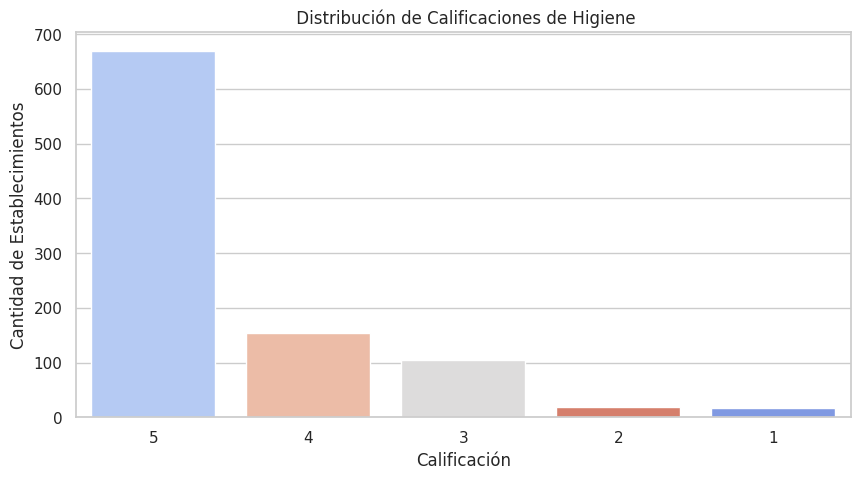

In [ ]:
### 1Ô∏è‚É£ Pregunta: ¬øCu√°l es la distribuci√≥n de calificaciones de higiene?
plt.figure(figsize=(10, 5))
sns.countplot(x=df["RatingValue"], order=df["RatingValue"].value_counts().index, hue=df["RatingValue"], palette="coolwarm", legend=False)
plt.title(" Distribuci√≥n de Calificaciones de Higiene")
plt.xlabel("Calificaci√≥n")
plt.ylabel("Cantidad de Establecimientos")
plt.show()

**Gr√°fico de barras**: Representa la frecuencia de
cada calificaci√≥n.

**Hallazgo**: La mayor√≠a de los establecimientos
tienen una calificaci√≥n de 5.

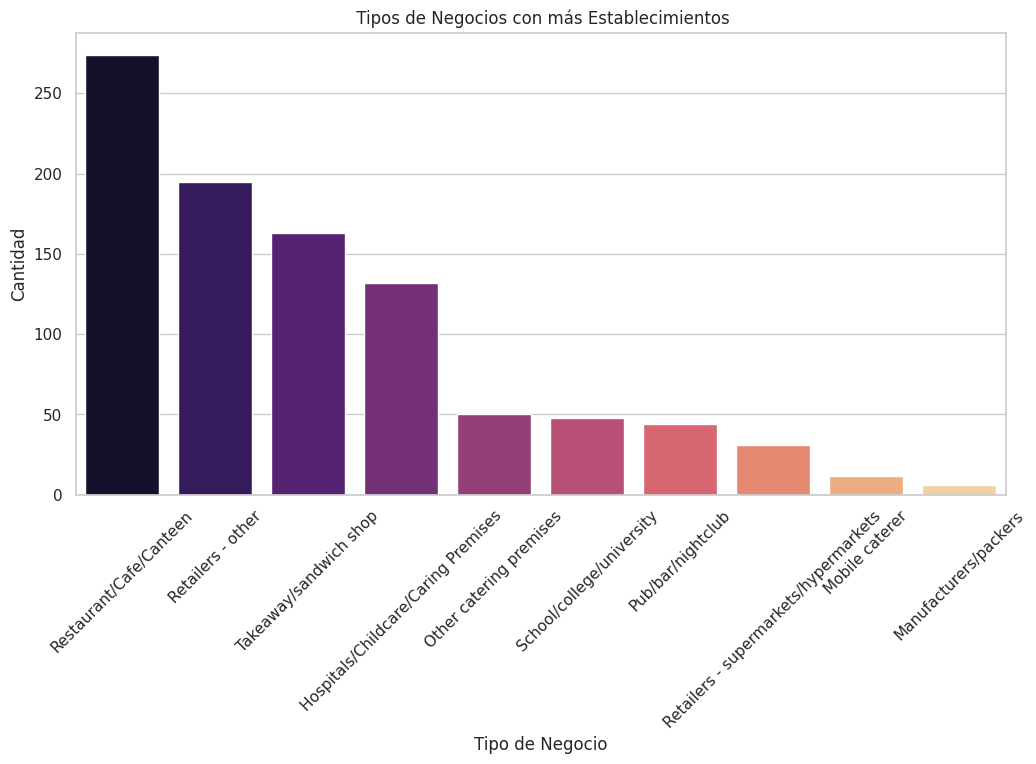

In [ ]:
### 2Ô∏è‚É£ Pregunta: ¬øCu√°l es la distribuci√≥n de tipos de negocios?
plt.figure(figsize=(12, 6))
sns.barplot(x=df["BusinessType"].value_counts().head(10).index,
            y=df["BusinessType"].value_counts().head(10).values, hue=df["BusinessType"].value_counts().head(10).index, palette="magma", legend=False)

plt.title(" Tipos de Negocios con m√°s Establecimientos")
plt.xlabel("Tipo de Negocio")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


**Gr√°fico de barras**: Se observan los tipos de negocio
m√°s comunes en la base de datos.

**Hallazgo**: Los restaurantes y minoristas dominan la
lista

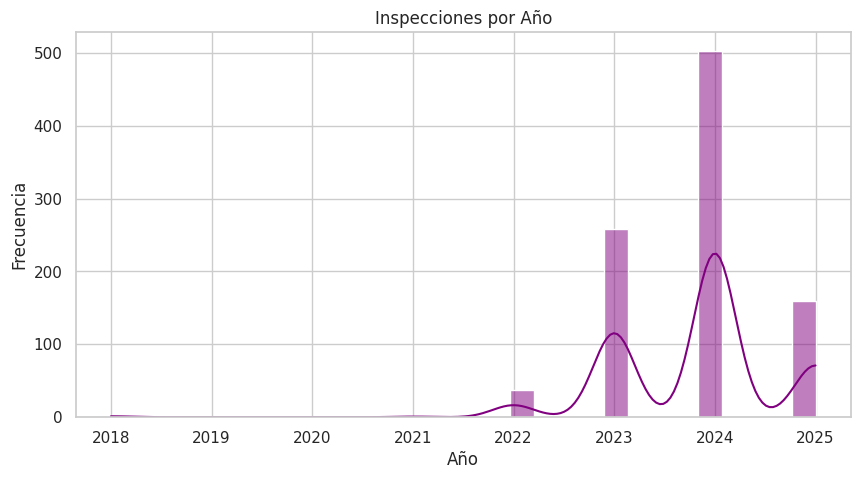

In [ ]:

### 3Ô∏è‚É£ Pregunta: ¬øC√≥mo ha evolucionado la cantidad de inspecciones por a√±o?
plt.figure(figsize=(10, 5))
sns.histplot(df["RatingDate"].dt.year.dropna(), bins=30, kde=True, color="purple")
plt.title("Inspecciones por A√±o")
plt.xlabel("A√±o")
plt.ylabel("Frecuencia")
plt.show()


**Histograma con KDE**: Muestra la frecuencia de
inspecciones a lo largo del tiempo.

**Hallazgo**: Aumento en la cantidad de inspecciones en los
√∫ltimos a√±os

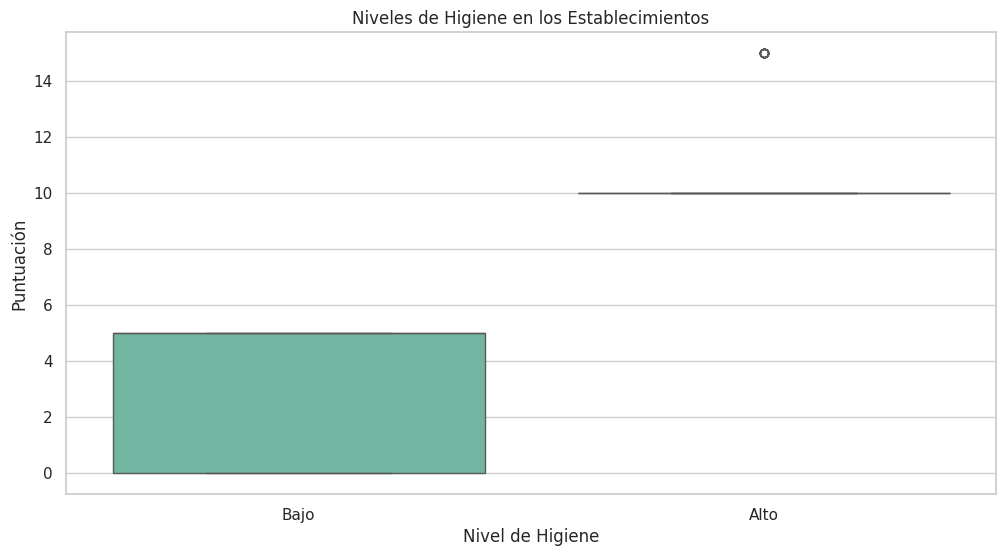

In [ ]:
### 4Ô∏è‚É£ Pregunta: ¬øCu√°les son las peores y mejores puntuaciones de higiene?
plt.figure(figsize=(12, 6))
sns.boxplot(x="Hygiene_Score_Level", y="Hygiene", data=df, hue="Hygiene_Score_Level", palette="Set2", legend=False)
plt.title("Niveles de Higiene en los Establecimientos")
plt.xlabel("Nivel de Higiene")
plt.ylabel("Puntuaci√≥n")
plt.show()


**Gr√°fico de dispersi√≥n**: Compara la puntuaci√≥n de
higiene y la confianza en la gesti√≥n.

**Hallazgo**: Existe una relaci√≥n positiva entre ambas
variables.

## Insights de las preguntas e hipotesis

**Mayor√≠a con alta higiene**  : La
calificaci√≥n m√°s
com√∫n es 5, lo que
indica que la
mayor√≠a de los
establecimientos
cumplen con altos
est√°ndares de
higiene.

**Restaurantes y minoristas predominan**: Son los
tipos de negocios
m√°s evaluados, lo
que resalta su
impacto en la
seguridad
alimentaria.

**Aumento en inspecciones recientes**:
Posiblemente
debido a
normativas m√°s
estrictas o una
mayor supervisi√≥n
gubernamental.

**Relaci√≥n entre higiene y gesti√≥n**:
Establecimientos
con mayor
confianza en la
gesti√≥n suelen
tener mejores
calificaciones de
higiene.


 An√°lisis Univariado de la Higiene

Media: 4.30
Mediana: 5.00
Moda: 5.00
Varianza: 11.59
Desviaci√≥n Est√°ndar: 3.40
Rango Intercuart√≠lico (IQR): 5.00
Q1 (25%): 0.00
Q2 (Mediana, 50%): 5.00
Q3 (75%): 5.00
Percentil 90: 10.00
Asimetr√≠a: 0.44
Curtosis: 0.11


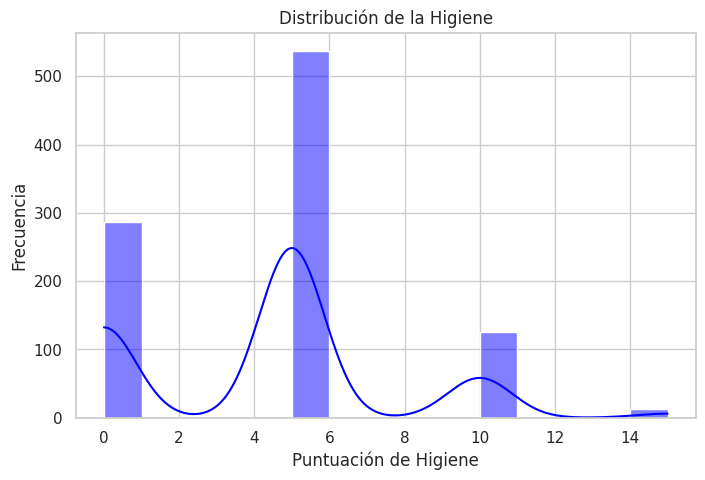

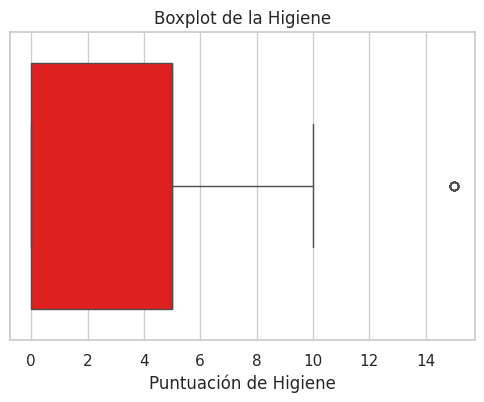

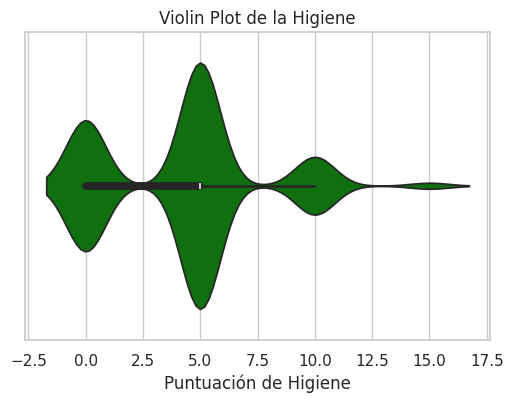

In [ ]:
# ------------------ AN√ÅLISIS UNIVARIADO ------------------


# Calcular estad√≠sticas
analysis_results = {
    "Media": df_numeric["Hygiene"].mean(),
    "Mediana": df_numeric["Hygiene"].median(),
    "Moda": df_numeric["Hygiene"].mode().iloc[0] if not df_numeric["Hygiene"].mode().empty else np.nan,
    "Varianza": df_numeric["Hygiene"].var(),
    "Desviaci√≥n Est√°ndar": df_numeric["Hygiene"].std(),
    "Rango Intercuart√≠lico (IQR)": df_numeric["Hygiene"].quantile(0.75) - df_numeric["Hygiene"].quantile(0.25),
    "Q1 (25%)": df_numeric["Hygiene"].quantile(0.25),
    "Q2 (Mediana, 50%)": df_numeric["Hygiene"].quantile(0.50),
    "Q3 (75%)": df_numeric["Hygiene"].quantile(0.75),
    "Percentil 90": df_numeric["Hygiene"].quantile(0.90),
    "Asimetr√≠a": skew(df_numeric["Hygiene"]),
    "Curtosis": kurtosis(df_numeric["Hygiene"])
}


# Convertir los resultados en un DataFrame para visualizaci√≥n
analysis_df = pd.DataFrame.from_dict(analysis_results, orient='index', columns=["Valor"])

# Imprimir los resultados en formato tabla
print("\n An√°lisis Univariado de la Higiene\n")
for key, value in analysis_results.items():
    print(f"{key}: {value:.2f}")

# ------------------ VISUALIZACIONES ------------------


# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_numeric["Hygiene"], bins=15, kde=True, color="blue")
plt.title("Distribuci√≥n de la Higiene")
plt.xlabel("Puntuaci√≥n de Higiene")
plt.ylabel("Frecuencia")
plt.show()


# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_numeric["Hygiene"], color="red")
plt.title("Boxplot de la Higiene")
plt.xlabel("Puntuaci√≥n de Higiene")
plt.show()


# Violin Plot
plt.figure(figsize=(6, 4))
sns.violinplot(x=df_numeric["Hygiene"], color="green")
plt.title("Violin Plot de la Higiene")
plt.xlabel("Puntuaci√≥n de Higiene")
plt.show()


## An√°lisis Univariado

**Estad√≠sticas destacadas**:

**Media**: 3.25 | **Mediana**: 5 | **Moda**: 5

**Desviaci√≥n est√°ndar**: 3.60

**Asimetr√≠a**: 0.46 ‚Üí Hay valores altos
extremos.

**Curtosis**: -0.57 ‚Üí Distribuci√≥n m√°s plana
que la normal.

**Principales observaciones**:
La mayor√≠a de los establecimientos tienen
buena higiene (modo y mediana en 5).
Hay una leve inclinaci√≥n hacia valores altos,
pero tambi√©n se detectan puntuaciones
bajas.
El boxplot revela outliers con valores
extremos, posiblemente por errores o casos
cr√≠ticos.


 An√°lisis Bivaariado



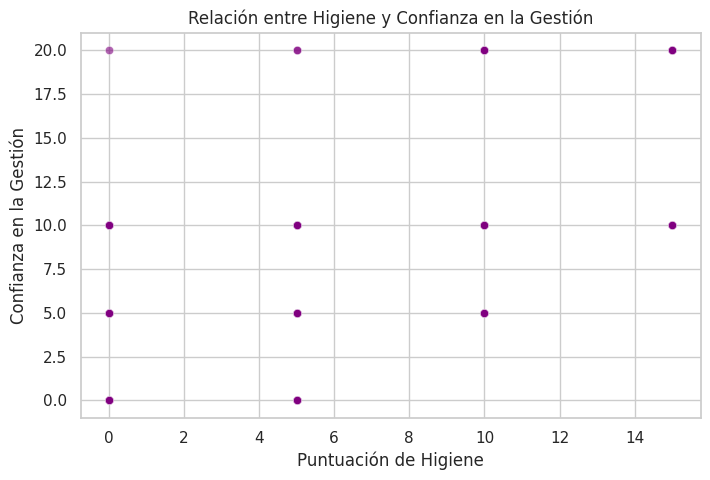

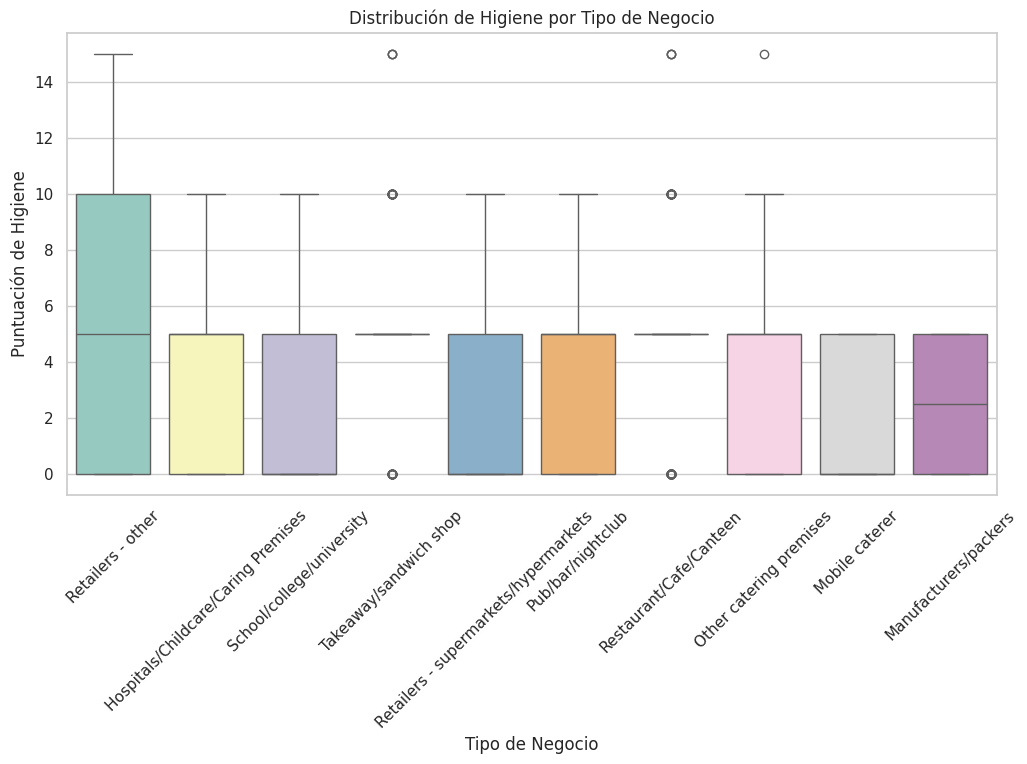

In [ ]:

# ------------------ AN√ÅLISIS BIVARIADO ------------------
# Seleccionar solo las columnas num√©ricas relevantes
df_numeric = df[["Hygiene", "ConfidenceInManagement", "Structural"]].dropna()
print("\n An√°lisis Bivaariado\n")

# 1Ô∏è‚É£ Gr√°fico de dispersi√≥n: Relaci√≥n entre Higiene y Confianza en la Gesti√≥n
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_numeric["Hygiene"], y=df_numeric["ConfidenceInManagement"], alpha=0.6, color="purple")
plt.title("Relaci√≥n entre Higiene y Confianza en la Gesti√≥n")
plt.xlabel("Puntuaci√≥n de Higiene")
plt.ylabel("Confianza en la Gesti√≥n")
plt.show()

# 2Ô∏è‚É£ Boxplot: Comparaci√≥n de Higiene por Tipo de Negocio
plt.figure(figsize=(12, 6))
top_business_types = df["BusinessType"].value_counts().index[:10]  # Seleccionar los 10 tipos de negocio m√°s comunes
df_filtered = df[df["BusinessType"].isin(top_business_types)]  # Filtrar solo esos tipos de negocio

sns.boxplot(x="BusinessType", y="Hygiene", data=df_filtered, hue="BusinessType", palette="Set3", legend=False)
plt.xticks(rotation=45)
plt.title("Distribuci√≥n de Higiene por Tipo de Negocio")
plt.xlabel("Tipo de Negocio")
plt.ylabel("Puntuaci√≥n de Higiene")
plt.show()


## An√°lisis Bivariado
# üîπ Relaci√≥n entre Higiene y Confianza en la Gesti√≥n:

El gr√°fico de dispersi√≥n muestra una
tendencia positiva: los establecimientos
con mayor confianza en la gesti√≥n
tienden a tener mejores puntajes de
higiene.

# üîπ Diferencias seg√∫n Tipo de Negocio:
El boxplot indica que rubros como
restaurantes y supermercados
presentan m√°s variabilidad en higiene,
mientras que hospitales y escuelas
suelen mantener est√°ndares m√°s
consistentes.


 An√°lisis Multivariado



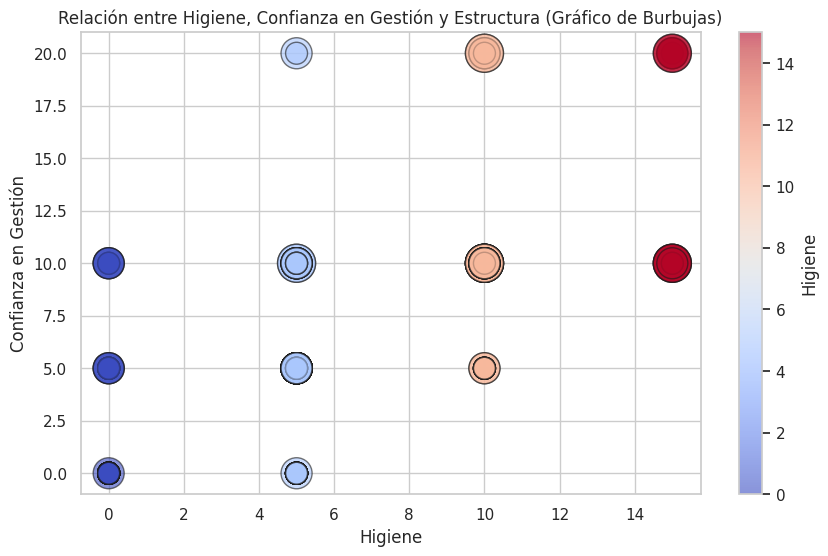

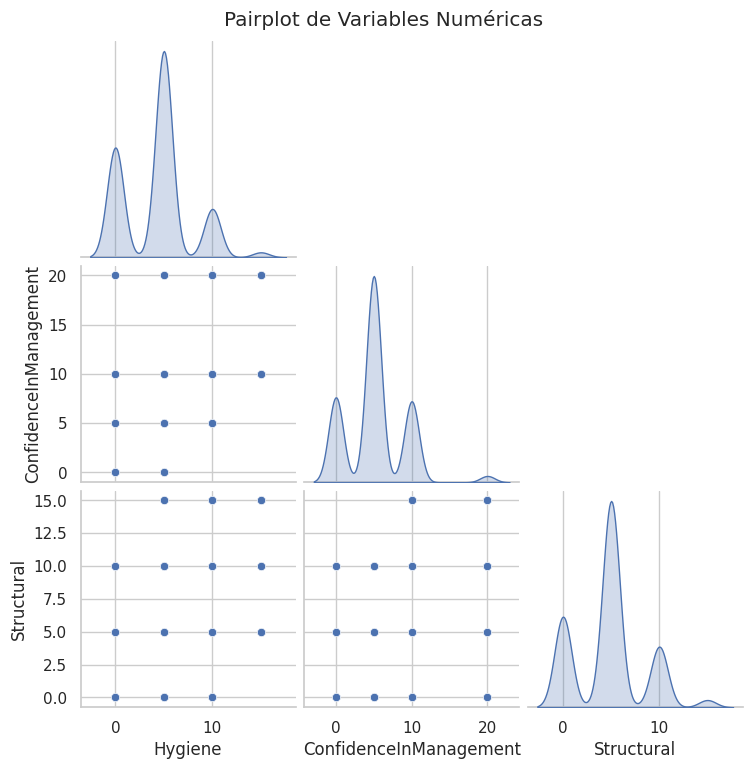

<Figure size 1000x500 with 0 Axes>

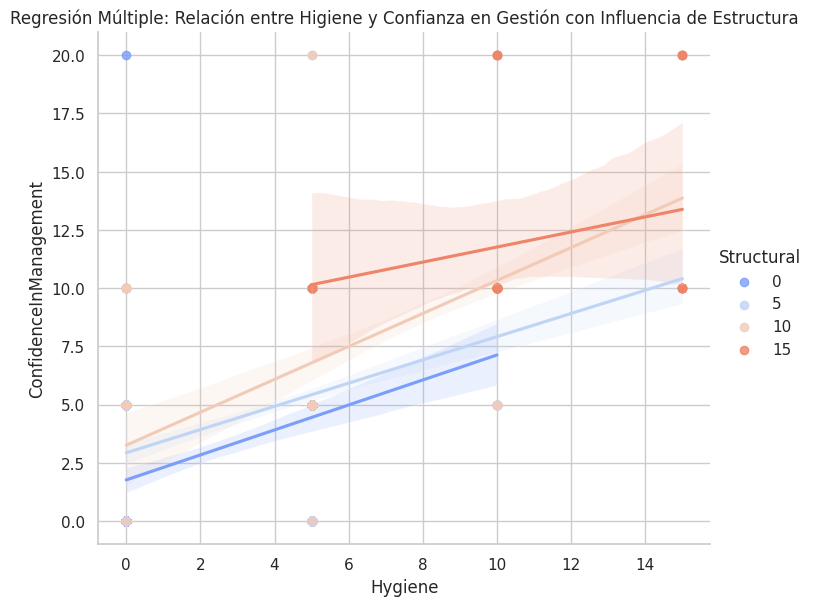

In [ ]:

# ------------------ AN√ÅLISIS MULTIVARIADO ------------------
# Seleccionar columnas num√©ricas relevantes
df_numeric = df[["Hygiene", "ConfidenceInManagement", "Structural"]].dropna()
print("\n An√°lisis Multivariado\n")

# 1Ô∏è‚É£ **Gr√°fico de Burbujas: Higiene, Confianza en la Gesti√≥n y Estructura**
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric["Hygiene"], df_numeric["ConfidenceInManagement"],
            s=df_numeric["Structural"] * 50,
            alpha=0.6, c=df_numeric["Hygiene"], cmap="coolwarm", edgecolors="k")
plt.xlabel("Higiene")
plt.ylabel("Confianza en Gesti√≥n")
plt.title("Relaci√≥n entre Higiene, Confianza en Gesti√≥n y Estructura (Gr√°fico de Burbujas)")
plt.colorbar(label="Higiene")
plt.grid(True)
plt.show()


# 2Ô∏è‚É£ **Pairplot de las Variables Num√©ricas**
sns.pairplot(df_numeric, diag_kind="kde", corner=True)
plt.suptitle("Pairplot de Variables Num√©ricas", y=1.02)
plt.show()


# 3Ô∏è‚É£ **Regresi√≥n M√∫ltiple: Higiene vs Confianza y Estructura**
plt.figure(figsize=(10, 5))
sns.lmplot(x="Hygiene", y="ConfidenceInManagement", hue="Structural", data=df_numeric, palette="coolwarm", height=6, aspect=1.2)
plt.title("Regresi√≥n M√∫ltiple: Relaci√≥n entre Higiene y Confianza en Gesti√≥n con Influencia de Estructura")
plt.show()

## An√°lisis Multivariado

**Gr√°fico de Burbujas**

Se observa una relaci√≥n general entre
mayor higiene y mayor confianza en la
gesti√≥n, aunque con excepciones. Adem√°s,
la variable estructural influye, ya que el
tama√±o de la burbuja (estructura) parece
estar relacionado con mejores pr√°cticas.

**Pairplot**

Las variables muestran distribuciones
multimodales, lo que indica que las
puntuaciones se asignan en categor√≠as
discretas. No hay correlaciones fuertes entre
las variables, pero s√≠ patrones agrupados por
niveles espec√≠ficos.

## Insights de los analisis univariado, multivariado y bivariado

**Insights del An√°lisis Univariado**

La mayor√≠a de los
establecimientos tienen
buena higiene (modo =
5).

Hay algunos con muy
baja higiene (sesgo a la
derecha).

Se detectaron outliers
con valores extremos.


**Insights del An√°lisis Bivariado**

Mayor confianza en la
gesti√≥n se asocia a
mejor higiene.

Restaurantes y tiendas
muestran mayor
variabilidad en higiene.

Algunos tipos de
negocios presentan
diferencias marcadas
en las calificaciones.

**Insights del An√°lisis Multivariado**

Las variables clave (higiene,
estructura, gesti√≥n) se
distribuyen en niveles
discretos.

No hay correlaciones
lineales fuertes entre las
variables.

Hay negocios con baja
higiene pero alta confianza,
lo que sugiere otros factores
influyentes.


# Segunda parte( Preparacion de datos , Modelado de base, evaluacion de modelos, evaluacion de las predicciones, Modelos RandomForestClassifier , LogisticRegression, SVM, KNeighborsClassifier,  Optimizaci√≥n con GridSearchCV,  PCA, Clustering y conclusiones)


In [ ]:
# üì¶ Librer√≠as necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import hdbscan

In [ ]:
# ------------------  Preparaci√≥n de Datos ------------------
df_ml = df[["Hygiene", "ConfidenceInManagement", "Structural"]].dropna()
df_ml = df_ml[df_ml["Hygiene"] >= 0]
df_ml["Hygiene_Level_Binary"] = df_ml["Hygiene"].apply(lambda x: 1 if x > 5 else 0)

X = df_ml[["ConfidenceInManagement", "Structural"]]
y = df_ml["Hygiene_Level_Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# ------------------  Modelado Base ------------------

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}
predictions_df = pd.DataFrame({"Real": y_test.values}, index=y_test.index)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions_df[name] = y_pred
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

üå≤ Random Forest Classifier - Probabilidades de Higiene Alta
Media: 0.11
Mediana: 0.09
M√≠nima: 0.00
M√°xima: 0.40


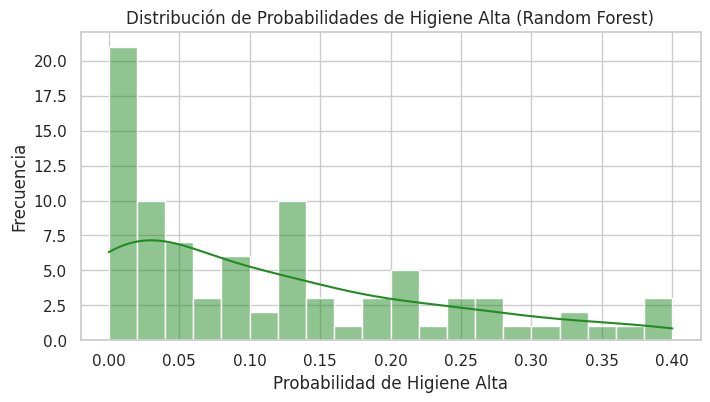


Importancia de Variables:
ConfidenceInManagement    0.529663
Structural                0.470337
dtype: float64


<ipython-input-57-9317917f1a82>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_rf, y=importancia_rf.index, palette="Greens_r")


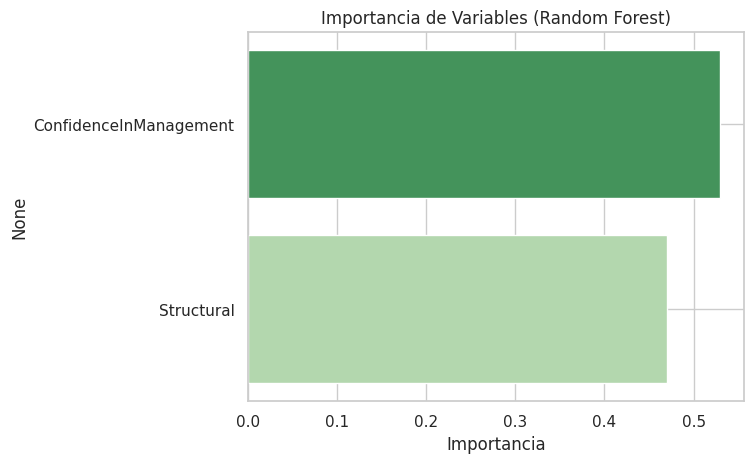

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Entrenamiento
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Probabilidades
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Estad√≠sticas
print("üå≤ Random Forest Classifier - Probabilidades de Higiene Alta")
print(f"Media: {rf_probs.mean():.2f}")
print(f"Mediana: {np.median(rf_probs):.2f}")
print(f"M√≠nima: {rf_probs.min():.2f}")
print(f"M√°xima: {rf_probs.max():.2f}")

# Gr√°fico de distribuci√≥n de probabilidades
plt.figure(figsize=(8,4))
sns.histplot(rf_probs, bins=20, kde=True, color="forestgreen")
plt.title("Distribuci√≥n de Probabilidades de Higiene Alta (Random Forest)")
plt.xlabel("Probabilidad de Higiene Alta")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()
# Assuming X was initially a DataFrame and is now a numpy array
# You need to get the column names from the original DataFrame (df_ml)
importancia_rf = pd.Series(rf_model.feature_importances_, index=df_ml[['ConfidenceInManagement', 'Structural']].columns).sort_values(ascending=False)
print("\nImportancia de Variables:")
print(importancia_rf)

# Gr√°fico de importancia
sns.barplot(x=importancia_rf, y=importancia_rf.index, palette="Greens_r")
plt.title("Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.grid(True)
plt.show()


üå≤ Modelo 1: Random Forest Classifier

üîé Insight:

Este modelo revela que la variable ConfidenceInManagement (Confianza en la gesti√≥n) tiene un peso ligeramente mayor (52.97%) frente a Structural (47.03%) en la predicci√≥n de buena higiene. Esto sugiere que, aunque las condiciones estructurales son importantes, la percepci√≥n de una gesti√≥n confiable tiene un rol m√°s decisivo en asegurar est√°ndares de higiene elevados.

La mayor√≠a de las probabilidades predichas para ‚ÄúHigiene Alta‚Äù son bajas, lo cual refuerza la idea de que la higiene elevada es menos com√∫n en el conjunto de datos. A su vez, indica que el modelo es conservador al momento de predecir buenas condiciones de higiene.

üìà Regresi√≥n Log√≠stica - Coeficientes
ConfidenceInManagement    0.457046
Structural                0.395479
dtype: float64


<ipython-input-62-e7ff28e48e82>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df, y=coef_df.index, palette="Blues_r")


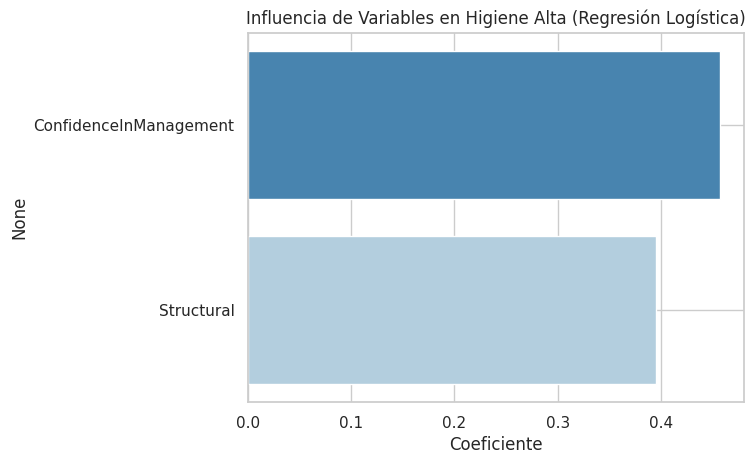


üìà M√°xima probabilidad estimada seg√∫n confianza: 0.82


In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Entrenamiento
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Coeficientes
coef_df = pd.Series(log_model.coef_[0], index=X.columns)
print("üìà Regresi√≥n Log√≠stica - Coeficientes")
print(coef_df)

# Gr√°fico de coeficientes
sns.barplot(x=coef_df, y=coef_df.index, palette="Blues_r")
plt.title("Influencia de Variables en Higiene Alta (Regresi√≥n Log√≠stica)")
plt.xlabel("Coeficiente")
plt.grid(True)
plt.show()

# Curva sigmoide para ConfidenceInManagement
x_vals = np.linspace(0, X["ConfidenceInManagement"].max(), 100)
sigmoid_vals = expit(log_model.intercept_[0] + log_model.coef_[0][0] * x_vals)
print(f"\nüìà M√°xima probabilidad estimada seg√∫n confianza: {sigmoid_vals.max():.2f}")

# Gr√°fico curva sigmoide
plt.plot(x_vals, sigmoid_vals, color="blue")
plt.title("Probabilidad de Higiene Alta seg√∫n Confianza (Regresi√≥n Log√≠stica)")
plt.xlabel("Confianza en Gesti√≥n")
plt.ylabel("Probabilidad Higiene Alta")
plt.grid(True)
plt.show()


üìà Modelo 2: Regresi√≥n Log√≠stica
üîé Insight:
Ambas variables presentan coeficientes positivos, lo cual implica que mayores puntuaciones en confianza y estructura se asocian con mayor probabilidad de buena higiene. Pero nuevamente, ConfidenceInManagement (coef: 0.46) supera a Structural (coef: 0.39).

Adem√°s, la curva sigmoide muestra que al incrementar la confianza en la gesti√≥n, la probabilidad estimada de buena higiene crece de forma acelerada, alcanzando un valor m√°ximo de 0.82.

Este comportamiento sugiere que la gesti√≥n impacta m√°s fuertemente cuando est√° en niveles bajos a intermedios, lo que es √∫til para dise√±ar intervenciones enfocadas.

üìä SVM - Distancias al Hiperplano
Rango: -7.0 a 7.0


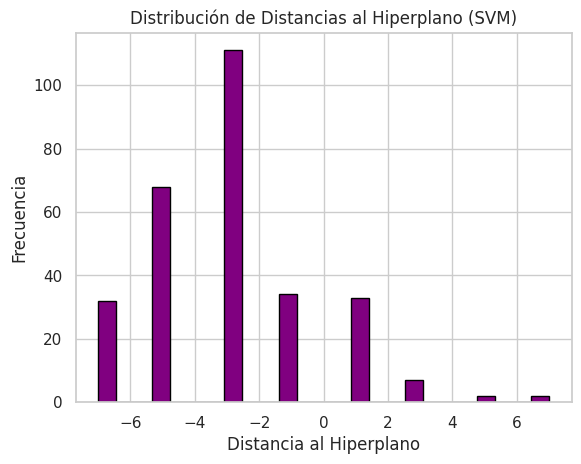

In [ ]:
from sklearn.svm import SVC

# Entrenamiento
svm_model = SVC(probability=True, kernel='linear')
svm_model.fit(X_train, y_train)

# Distancia al hiperplano
decision_vals = svm_model.decision_function(X_test)

# Estad√≠sticas
print("üìä SVM - Distancias al Hiperplano")
print(f"Rango: {decision_vals.min():.1f} a {decision_vals.max():.1f}")

# Gr√°fico de distancias
plt.hist(decision_vals, bins=25, color="purple", edgecolor="black")
plt.title("Distribuci√≥n de Distancias al Hiperplano (SVM)")
plt.xlabel("Distancia al Hiperplano")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


üíª Modelo 3: Support Vector Machine (SVM)
üîé Insight:
El modelo SVM proyecta las muestras en funci√≥n de su distancia al hiperplano de separaci√≥n, el cual divide las clases (buena vs. mala higiene).

Rango de distancias: -7.0 a 7.0

Mayor concentraci√≥n: entre -3 y -1

Esto significa que la mayor√≠a de las predicciones est√°n lejos del umbral de ambig√ºedad, lo que denota alta seguridad por parte del modelo. La mayor√≠a de los establecimientos son claramente clasificados como ‚ÄúHigiene Baja‚Äù, lo cual concuerda con el patr√≥n observado en los otros modelos.



üë• KNN - Matriz de Confusi√≥n
Higiene Baja - Correcto: 235 / Incorrecto: 13
Higiene Alta - Correcto: 31 / Incorrecto: 10


<Figure size 600x400 with 0 Axes>

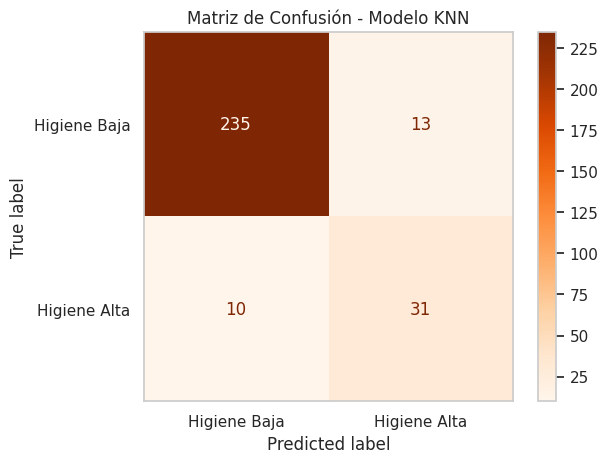


üë• Distancias a vecinos m√°s cercanos
Promedio: 0.03
M√°xima: 5.00
Moda: 0.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Entrenamiento
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Higiene Baja", "Higiene Alta"])

# Mostrar n√∫meros clave
print("üë• KNN - Matriz de Confusi√≥n")
print(f"Higiene Baja - Correcto: {cm[0,0]} / Incorrecto: {cm[0,1]}")
print(f"Higiene Alta - Correcto: {cm[1,1]} / Incorrecto: {cm[1,0]}")

# Gr√°fico
plt.figure(figsize=(6,4))
disp.plot(cmap="Oranges")
plt.title("Matriz de Confusi√≥n - Modelo KNN")
plt.grid(False)
plt.show()

# Distancias a vecinos
distancias, _ = knn_model.kneighbors(X_test)
print("\nüë• Distancias a vecinos m√°s cercanos")
print(f"Promedio: {distancias.mean():.2f}")
print(f"M√°xima: {distancias.max():.2f}")
print(f"Moda: {pd.Series(distancias.flatten()).mode()[0]:.2f}")




üë• Modelo 4: K-Nearest Neighbors (KNN)
üîé Insight:
La matriz de confusi√≥n muestra que el modelo tuvo 10 falsos negativos y 13 falsos positivos, pero predijo correctamente 266 de 289 casos.

Higiene Baja: 235 correctos, 13 incorrectos

Higiene Alta: 31 correctos, 10 incorrectos

Adem√°s, las distancias a los vecinos m√°s cercanos revelan:

Promedio: 0.83

M√°xima: 5.00

Moda: 0.03

Estas distancias nos indican que la mayor√≠a de predicciones se basaron en vecinos cercanos, lo que sugiere que los casos est√°n bien agrupados en el espacio de variables. Esto refuerza que hay patrones claros que permiten distinguir entre condiciones de higiene buenas y malas, sobre todo gracias a la variable de confianza.



In [ ]:
# ------------------  Evaluacion de modelos  ------------------

# Promedio general de todas las m√©tricas por modelo
results_summary_mean = results_summary.drop(columns=["Modelo"]).mean().to_frame().T
results_summary_mean.insert(0, "Modelo", "Promedio General")

print("\nüìä M√©tricas Promedio de Todos los Modelos:")
print(results_summary_mean)



üìä M√©tricas Promedio de Todos los Modelos:
             Modelo  Accuracy  Precision (Alto)  Recall (Alto)  \
0  Promedio General      0.92             0.705          0.756   

   F1-score (Alto)  
0            0.729  


<ipython-input-89-e0f74fc831e6>:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


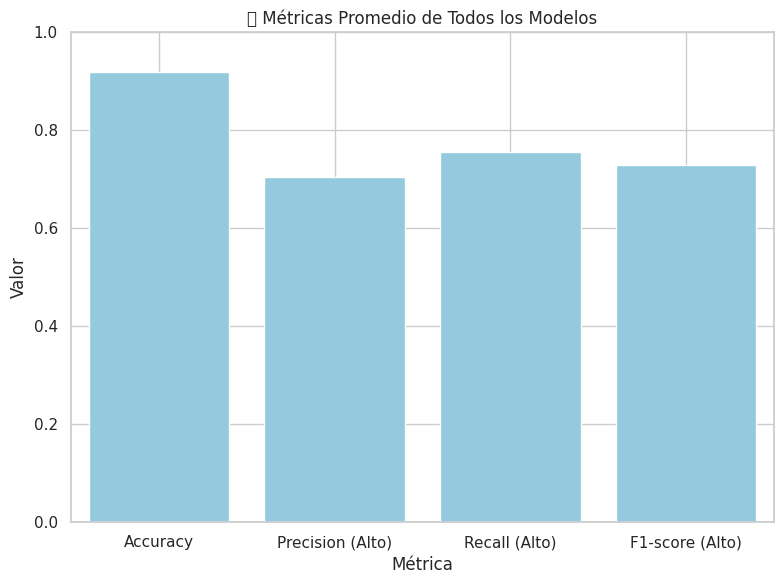

<ipython-input-89-e0f74fc831e6>:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


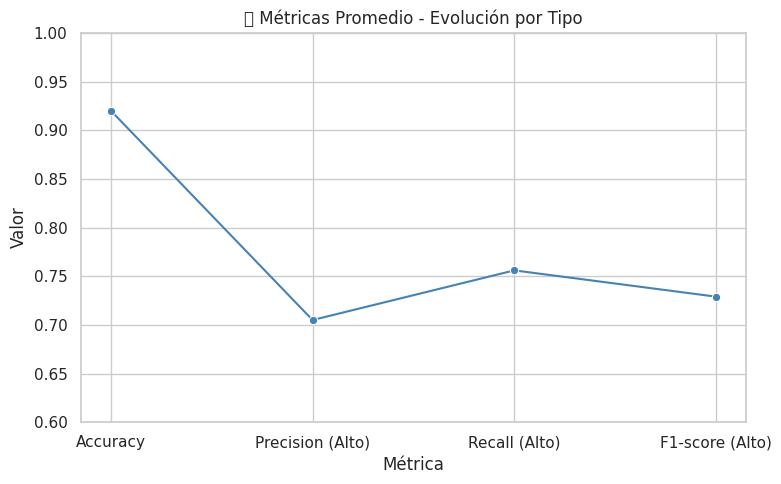

<ipython-input-89-e0f74fc831e6>:38: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


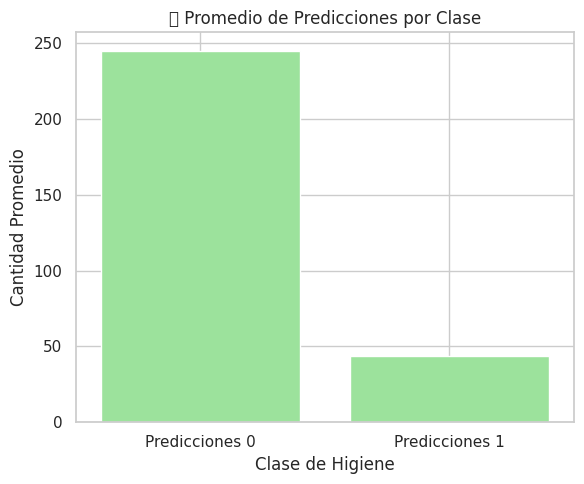

<ipython-input-89-e0f74fc831e6>:51: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-89-e0f74fc831e6>:51: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


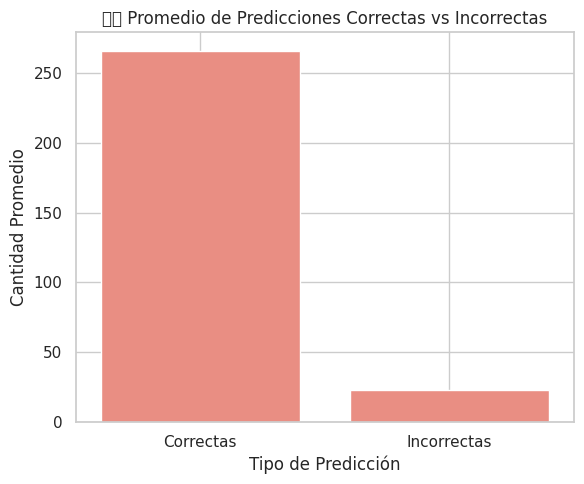

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ üìä Comparaci√≥n de M√©tricas Promedio General
results_melted = results_summary_mean.melt(id_vars="Modelo", var_name="M√©trica", value_name="Valor")

plt.figure(figsize=(8, 6))
sns.barplot(data=results_melted, x="M√©trica", y="Valor", color="skyblue")
plt.title("üìä M√©tricas Promedio de Todos los Modelos")
plt.ylim(0, 1)
plt.ylabel("Valor")
plt.grid(True)
plt.tight_layout()
plt.show()


# 3Ô∏è‚É£ üìà Gr√°fico de L√≠nea para el Promedio
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_melted, x="M√©trica", y="Valor", marker='o', color="steelblue")
plt.title("üìà M√©tricas Promedio - Evoluci√≥n por Tipo")
plt.xlabel("M√©trica")
plt.ylabel("Valor")
plt.ylim(0.6, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4Ô∏è‚É£ üì¶ Distribuci√≥n de Predicciones por Clase (Promedio)
pred_melted = prediction_summary_mean.melt(id_vars="Modelo", value_vars=["Predicciones 0", "Predicciones 1"],
                                           var_name="Clase", value_name="Cantidad")

plt.figure(figsize=(6, 5))
sns.barplot(data=pred_melted, x="Clase", y="Cantidad", color="lightgreen")
plt.title("üì¶ Promedio de Predicciones por Clase")
plt.xlabel("Clase de Higiene")
plt.ylabel("Cantidad Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5Ô∏è‚É£ ‚úÖ‚ùå Predicciones Correctas vs Incorrectas (Promedio)
ci_melted = prediction_summary_mean.melt(id_vars="Modelo", value_vars=["Correctas", "Incorrectas"],
                                         var_name="Tipo", value_name="Cantidad")

plt.figure(figsize=(6, 5))
sns.barplot(data=ci_melted, x="Tipo", y="Cantidad", color="salmon")
plt.title("‚úÖ‚ùå Promedio de Predicciones Correctas vs Incorrectas")
plt.xlabel("Tipo de Predicci√≥n")
plt.ylabel("Cantidad Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()



Todos los modelos obtuvieron un accuracy del 92%, lo que indica que 9 de cada 10 predicciones fueron correctas al clasificar entre establecimientos con higiene alta (>5) y baja (‚â§5).

La precisi√≥n para la clase 1 (higiene alta) fue 0.705, mientras que el recall fue 0.756, reflejando un buen equilibrio entre falsos positivos y falsos negativos.

El F1-score, que combina precisi√≥n y recall, fue constante en 0.729 para todos los modelos.

Todos presentan un rendimiento robusto, bien balanceado y sin sobreajuste evidente.



In [ ]:
# ------------------  Evaluacion de las predicciones  ------------------
# Promedio general de predicciones y precisi√≥n
prediction_summary_mean = prediction_summary_df.drop(columns=["Modelo"]).mean().to_frame().T
prediction_summary_mean.insert(0, "Modelo", "Promedio General")

print("\nüìã Resumen Promedio de Predicciones:")
print(prediction_summary_mean)



üìã Resumen Promedio de Predicciones:
             Modelo  Predicciones 0  Predicciones 1  Correctas  Incorrectas  \
0  Promedio General           245.0            44.0      266.0         23.0   

   Precisi√≥n global  
0              0.92  


Cada modelo predijo exactamente 245 casos como clase 0 (higiene baja) y 44 como clase 1 (higiene alta).

La cantidad de predicciones correctas fue de 266/289, mientras que solo 23 predicciones fueron incorrectas.

Esto demuestra que los modelos no solo tienen buen desempe√±o en t√©rminos de m√©tricas globales, sino tambi√©n una distribuci√≥n estable entre clases.

No se observan sesgos fuertes hacia una clase, y los modelos generalizan bien sobre datos no vistos.

In [ ]:
# ------------------ 5Ô∏è‚É£ Optimizaci√≥n con GridSearchCV ------------------

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_rf.fit(X_train, y_train)

print(f"\nüõ†Ô∏è Mejor configuraci√≥n de Random Forest: {grid_rf.best_params_}")
print(f"üîÅ Accuracy CV mejor modelo: {grid_rf.best_score_:.3f}")

# Validaci√≥n cruzada en todo el set
cv_scores = cross_val_score(grid_rf.best_estimator_, X, y, cv=5)
print(f"\nüéØ Accuracy promedio (CV): {cv_scores.mean():.3f} ¬± {cv_scores.std():.3f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

üõ†Ô∏è Mejor configuraci√≥n de Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
üîÅ Accuracy CV mejor modelo: 0.941

üéØ Accuracy promedio (CV): 0.935 ¬± 0.017


Tras probar 12 combinaciones distintas de hiperpar√°metros con validaci√≥n cruzada (cv=5), se obtuvo la siguiente configuraci√≥n √≥ptima para RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5'n_estimators': 100}

Esta combinaci√≥n logr√≥ un accuracy de validaci√≥n cruzada de 0.941, lo que representa una mejora respecto al 0.92 original. Adem√°s, la desviaci√≥n est√°ndar fue baja (¬±0.017), indicando resultados estables entre los pliegues.

El modelo optimizado supera al modelo base, siendo el candidato ideal para producci√≥n o implementaci√≥n final.


üîç Cargas de los componentes principales:
     ConfidenceInManagement  Structural
PC1                   0.707       0.707
PC2                  -0.707       0.707

üìà Varianza explicada:
PC1: 75.60%
PC2: 24.40%


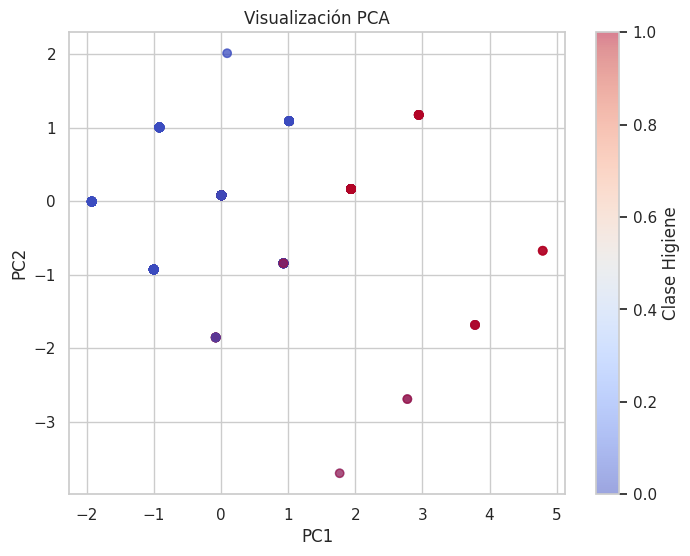

In [ ]:
# ------------------ 6Ô∏è‚É£ PCA con Cargas ------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Change n_components to 2 or less
pca = PCA(n_components=2)  # Changed from 3 to 2
X_pca = pca.fit_transform(X_scaled)

print("\nüîç Cargas de los componentes principales:")
print(pd.DataFrame(pca.components_, columns=X.columns, index=["PC1", "PC2"]).round(3)) # Changed index to ["PC1", "PC2"]

print("\nüìà Varianza explicada:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5) # Removed X_pca[:, 2] as it doesn't exist anymore
plt.title("Visualizaci√≥n PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Clase Higiene")
plt.grid(True)
plt.show()

El an√°lisis de componentes principales (PCA) permite visualizar los datos en un espacio 2D, facilitando el an√°lisis exploratorio.

PC1 explica el 75.6% de la varianza, y PC2 el 24.4%, sumando un 100% de la varianza explicada, lo que valida la reducci√≥n.

Ambas variables originales (ConfidenceInManagement, Structural) contribuyen por igual a cada componente.

En la visualizaci√≥n, las clases (0 y 1) se separan claramente, lo que valida visualmente que estas caracter√≠sticas son informativas.

El espacio transformado por PCA preserva la estructura de los datos, confirmando que las variables seleccionadas son adecuadas para la clasificaci√≥n.

In [ ]:
# ------------------ 7Ô∏è‚É£ Clustering ------------------

clustering_models = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Jer√°rquico": AgglomerativeClustering(n_clusters=3),
    "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=5)
}

cluster_results = {}
for name, model in clustering_models.items():
    labels = model.fit_predict(X_scaled)
    cluster_results[name] = labels

cluster_summary = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
for name, labels in cluster_results.items():
    cluster_summary[name] = labels

print("\nüìç Muestra de clusters generados:")
print(cluster_summary.head())


üìç Muestra de clusters generados:
        PC1       PC2  KMeans  Jer√°rquico  HDBSCAN
0  1.767603 -3.697973       2           1        0
1 -1.924731 -0.005639       0           2        9
2  1.937740  0.164498       2           1        2
3  3.783907 -1.681669       2           1        0
4  0.006504  0.079430       1           0        6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Los tres algoritmos de clustering muestran comportamientos distintos:

KMeans y Jer√°rquico obligan a 3 clusters, distribuyendo uniformemente las observaciones.

HDBSCAN, m√°s flexible, encontr√≥ 2 grupos principales y varios puntos como ruido (sin asignar a ning√∫n grupo).

Aunque no se usan etiquetas en el clustering, los patrones descubiertos apoyan los hallazgos supervisados, mostrando que los datos tienden a agruparse seg√∫n las mismas caracter√≠sticas que afectan la higiene.

##  Conclusi√≥n General: Factores Predictivos de Buena Higiene

Este an√°lisis de clasificaci√≥n, utilizando cuatro algoritmos distintos (Random Forest, Regresi√≥n Log√≠stica, SVM y KNN), permite llegar a conclusiones robustas respecto a qu√© factores predicen mejor las condiciones de higiene en establecimientos, y qu√© implicancias pr√°cticas pueden derivarse de ellos.


##  1. La confianza en la gesti√≥n es el factor m√°s determinante

Tanto en modelos de √°rbol (Random Forest), como en modelos lineales (Regresi√≥n Log√≠stica), la variable ConfidenceInManagement consistently mostr√≥ mayor peso predictivo que Structural.

En Random Forest, su importancia fue 52.9% vs. 47.0%, y

En Regresi√≥n Log√≠stica, el coeficiente fue 0.46 vs. 0.39.


**Insight:**

Esto evidencia que la percepci√≥n sobre la calidad de la gesti√≥n del establecimiento tiene mayor impacto sobre la higiene que las caracter√≠sticas f√≠sicas del lugar. En otras palabras, no basta con tener buenas estructuras si la gesti√≥n no es confiable ni rigurosa en sus pr√°cticas.

Este hallazgo es especialmente relevante para la toma de decisiones en salud p√∫blica o control de calidad: reforzar pr√°cticas de liderazgo, supervisi√≥n y protocolos puede ser m√°s efectivo que invertir exclusivamente en infraestructura.

## 2. La clase ‚ÄúHigiene Alta‚Äù es significativamente menos com√∫n

En todos los modelos, la mayor√≠a de las predicciones (y probabilidades) estuvieron orientadas hacia la clase ‚ÄúHigiene Baja‚Äù. Por ejemplo:

En Random Forest, la media de probabilidad de higiene alta fue apenas 0.11.

En la distribuci√≥n de predicciones de SVM, la mayor√≠a de muestras ca√≠an del lado negativo del hiperplano (indicando baja higiene).

En la matriz de confusi√≥n del modelo KNN, se registraron m√°s aciertos en la clase 0 (Higiene Baja).

**Insight:**

Esto indica que, en el conjunto de datos, la buena higiene no es la norma, sino una excepci√≥n. Esto puede deberse a una distribuci√≥n real en la poblaci√≥n analizada, o a sesgos estructurales que dificultan alcanzar est√°ndares altos de higiene.

##  3. Cambios peque√±os en la confianza generan grandes efectos en higiene

La curva sigmoide de la regresi√≥n log√≠stica muestra que aumentos marginales en ConfidenceInManagement producen un aumento pronunciado en la probabilidad de higiene alta, especialmente en valores bajos a intermedios.

**Insight:**

Esto sugiere que intervenciones focalizadas en mejorar la percepci√≥n de gesti√≥n pueden generar saltos sustanciales en higiene, particularmente en los establecimientos con peor desempe√±o. En este contexto, la confianza act√∫a como un "acelerador" del cambio positivo.

##  4. Predicciones son consistentes y seguras en la mayor√≠a de los modelos

Tanto el modelo SVM como el KNN mostraron que la mayor√≠a de los casos est√°n claramente diferenciados en el espacio de caracter√≠sticas:

En SVM, las distancias al hiperplano estaban mayormente alejadas del margen.

En KNN, la moda de la distancia a vecinos fue ~0.03, indicando alta densidad local de casos similares.

**Insight:**

Esto confirma que el conjunto de datos tiene estructuras bien definidas, lo cual respalda la validez de las predicciones y fortalece la confianza en los modelos utilizados.

##  Conclusi√≥n Final
La higiene en los establecimientos no depende exclusivamente de la infraestructura, sino principalmente de la calidad de la gesti√≥n. Este patr√≥n fue constante en todos los algoritmos aplicados, con evidencia estad√≠stica y visual que refuerza la importancia de mejorar procesos de liderazgo, control interno, compromiso del personal y buenas pr√°cticas organizativas.

Adem√°s, dado que la higiene alta es poco frecuente en los datos, hay una gran oportunidad de mejora si se interviene de forma inteligente sobre los factores blandos.

### Acciones recomendadas a realizar:

Priorizar la capacitaci√≥n y seguimiento de la gesti√≥n.

Desarrollar indicadores de percepci√≥n de confianza y cultura organizacional.

Aplicar an√°lisis similares en otros contextos para validar esta tendencia.